# Comparison Plots in Seaborn

    - Joint plots
    
    - Pair plots


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### joint plots

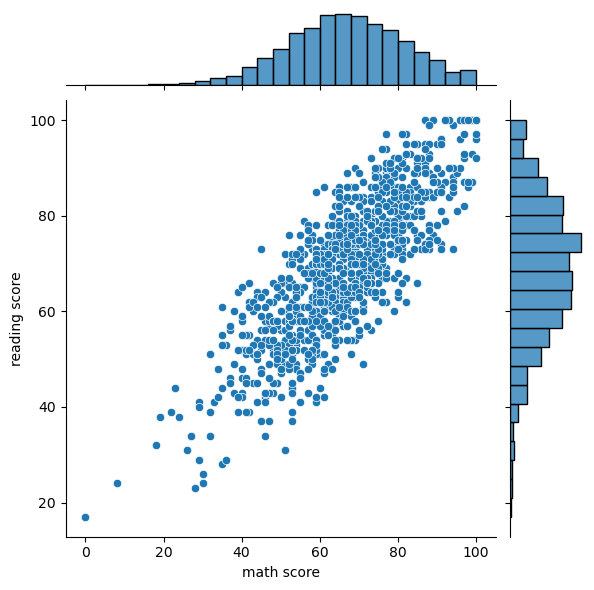

In [4]:
# scatter plot with histogram added

sns.jointplot(data=df, x='math score', y='reading score') #--> relation between two continuos feature type -math & reading score

--> we can see sctterplot of math vs reading score with additonal info of distribution of each of those two feature via histogram

-->i.e,  we can see the histogram for both reading score & math score as well


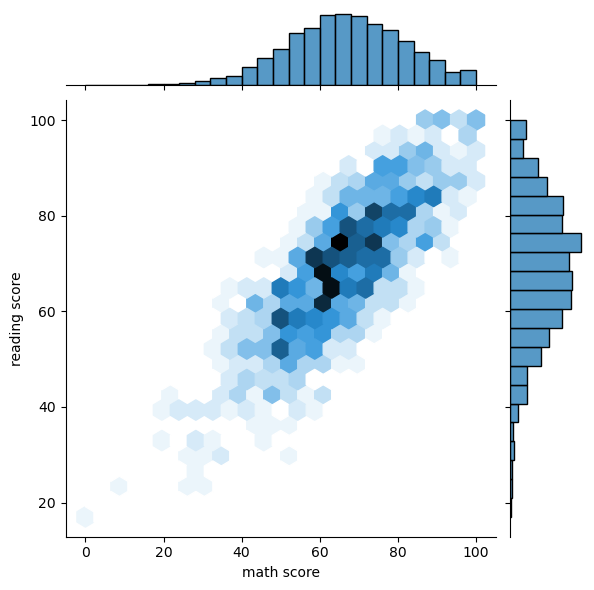

In [5]:
# kind params in jointplot ---> which by default is scatter plot

#----> i.e we can pass in kind param to see other plot instead of scatter plot

# --> eg- hexagogonal plot, dwas grid of hexagons on top of this scatter plot, counts how may poinst fall under each hexagon
        # & then darken the hexagon bas eon how many pts fall within each one (which is clear to understand)
    
sns.jointplot(data=df, x='math score', y='reading score', kind='hex') #--> passing in kind param as hexagon type

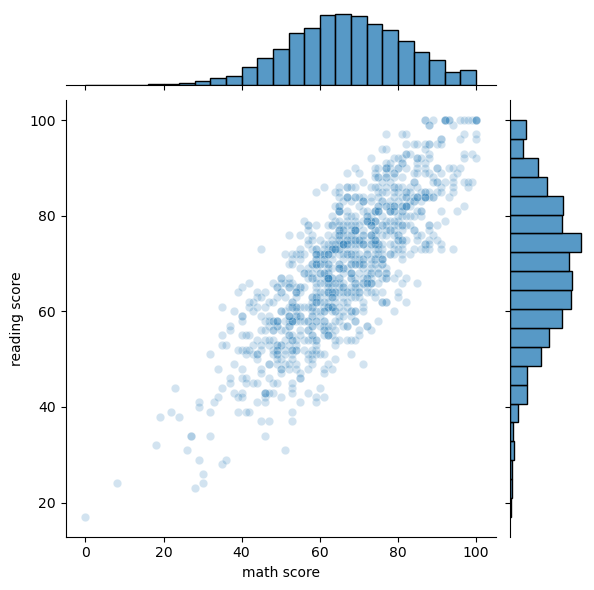

In [6]:
# recap - we can keep scatter plot & pass in alpha param to tranparency to dots to better understand the distrbition of pts

sns.jointplot(data=df, x='math score', y='reading score', alpha=0.2) # passing alpha as 0.2 transparent of dots

---> we have two option to either use alpha with satter plots or haxagonal plot to see more infos on where dat pts stack over each other


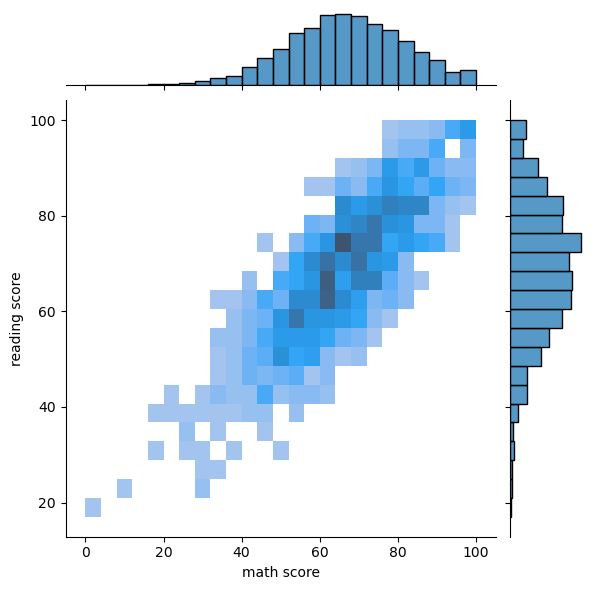

In [7]:
# histogram style plot --->bauch of square block which aligns with bins of histogram plot from both x & y continuos feature

sns.jointplot(data=df, x='math score', y='reading score', kind='hist') # --> passing in kind param as hist type

-----> NB- this plot can be unclear to most audience as they may not seen these plot typs before



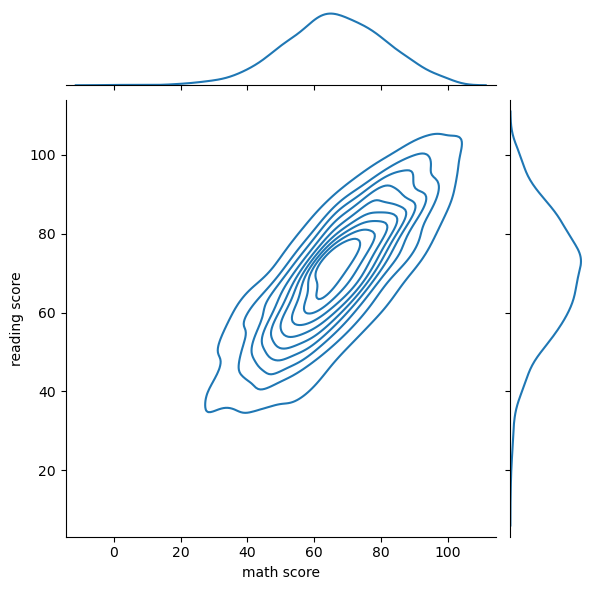

In [8]:
# passing in KDE plot kind

sns.jointplot(data=df, x='math score', y='reading score', kind='kde') # ---> passing in kind as kde plot type 
                                                                             # which replaces histogram


---> we can see it shows us 2 dimensional kde plot where where tthey cross over which is not shaded by default 

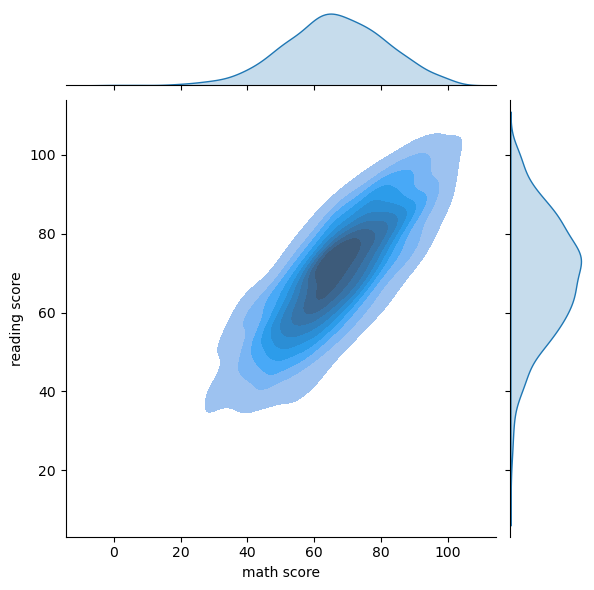

In [10]:
# adding shades to kde joint plot

sns.jointplot(data=df, x='math score', y='reading score', kind='kde', fill=True) # pssing in fill param as true

# NB - shade param is depracated, use fill param instead

NB --> we can edit pallete to any colormapping we want within matplotlib 

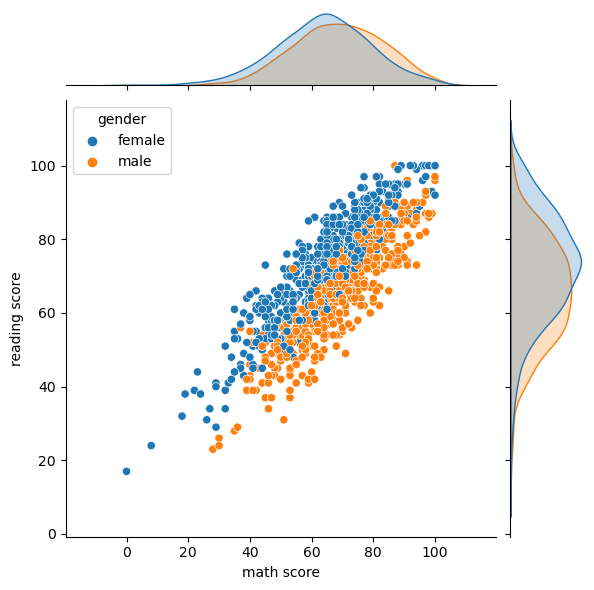

In [11]:
# hue param options in jointplot

sns.jointplot(data=df, x='math score', y='reading score', hue='gender') # pasing in hue as the gender, to reveal more infos


---> when we pass in hue param, then instead of stacking histogram on top of eact other, it creates two seperate kdes per hue for for  per continuos features 

---> then it also show the data pts themselve in color base of hue category 

---> this is the best way to show info using joint plots instead of just calling scatter plot

---> we can see it allows to compare not just the continuos features but also the distribution within each category for different categories  
 
 eg - gender female v/s male for math score & reading score etc
 
 ( we can see where the differences are within eash category)
 
 

### Pair Plots

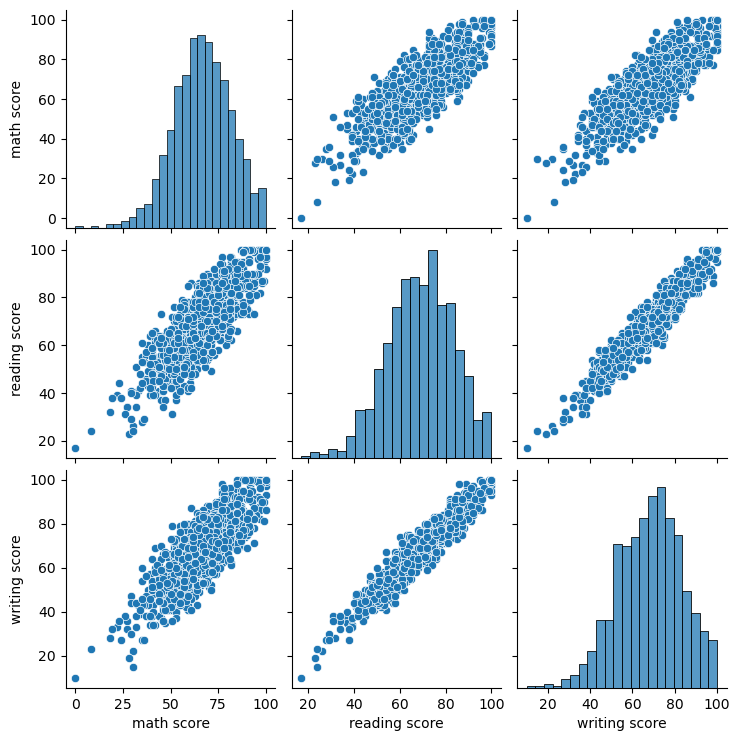

In [12]:
# pair plot ---> NB- very CPU & Memmory intensive ( * careful when using )


sns.pairplot(data=df) #---> we can just pass in the dataframe 

 ---> we can see it creates this pair grid for us comparing all continuos feature type against each other
 
 ---> along diagonals we have histogram for each of continuos feature 
 
 ---> NB -i.e we did not have to do any filtering, *** BUT it automatically grabs all the numerical columns & automatically shows us the histogram plot for each and also relationship between each of the combination 
 
         eg - reading vs maths, maths vs reading etc
         
----> thus because of this we have duplicate infos (plot relations) along diagonal        

----> it recommende we get rid upper diagonal duplicate plots



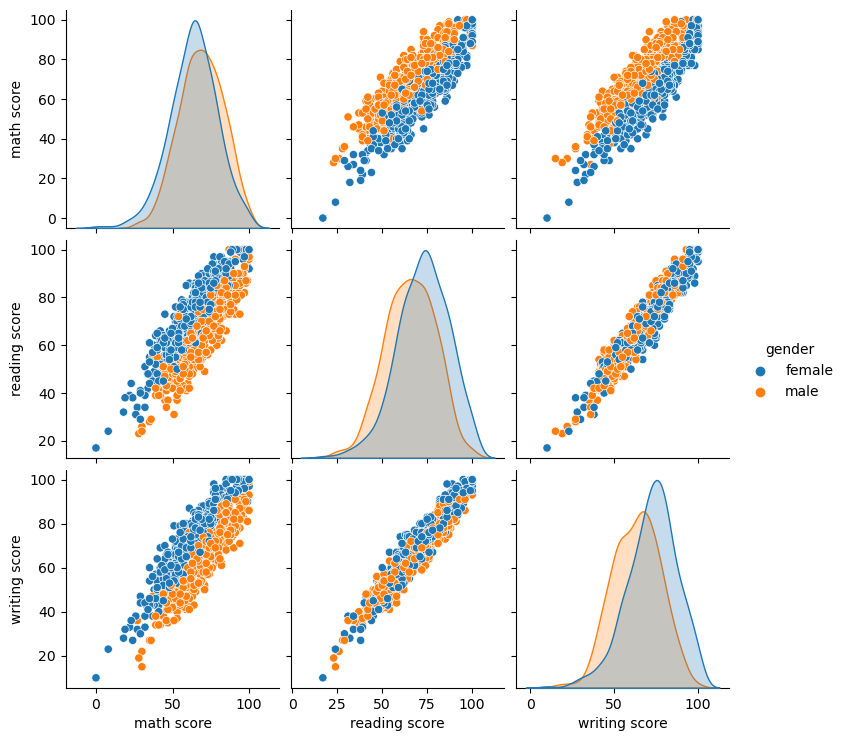

In [13]:
# hue param ---> we can pass in hue, seprate out infos(plot) base of base of category feature, eg - gender


sns.pairplot(data=df, hue='gender') # --> pass in hue as gender seperation of info

----> as when seprating out base of categories, it is hard to read a stacked histogram on top of each other   

----> which is why as we pass in hue, pair plot automatically turn the diagonal as kde plot which is much easier to read when comparing two diff categoies as we can see


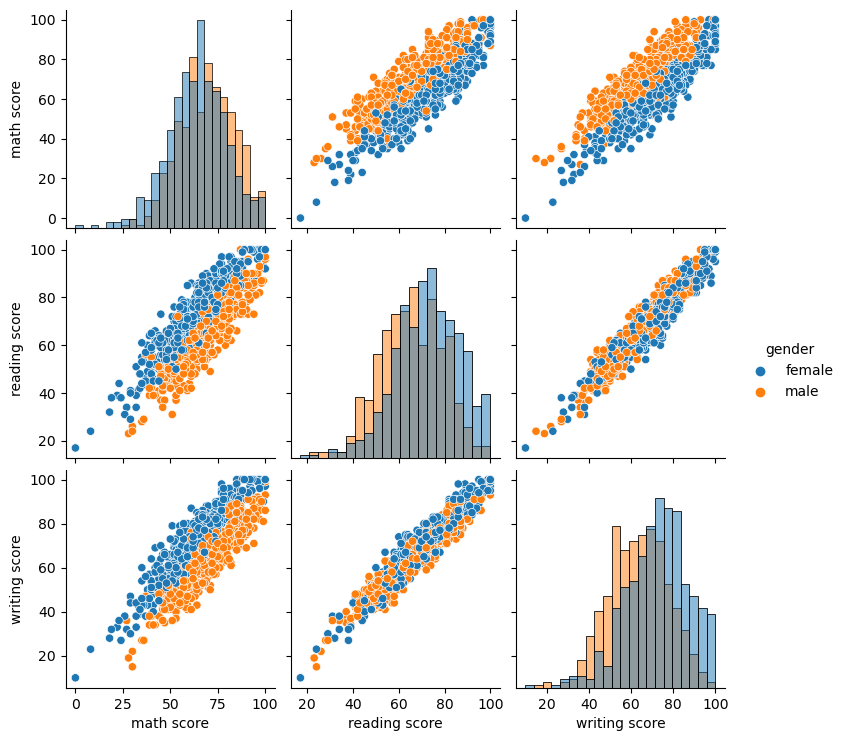

In [14]:
# diag_kind param ---> i.e we can keep diagonal as histogram in pair plot if we want to

sns.pairplot(data=df, hue='gender', diag_kind='hist') # passing in diag_kind param as hstogram

---> we can see it is difficult to read stacked histogram plot in compare to stacked kdes

#NB --> we can also see it (pair plot) takes more time compared to joint plot which is because it (pair plot) is dealing with the entire dataframe

----> *WARNING - i.e, always be careful when calling the pairplot on super large dataframe

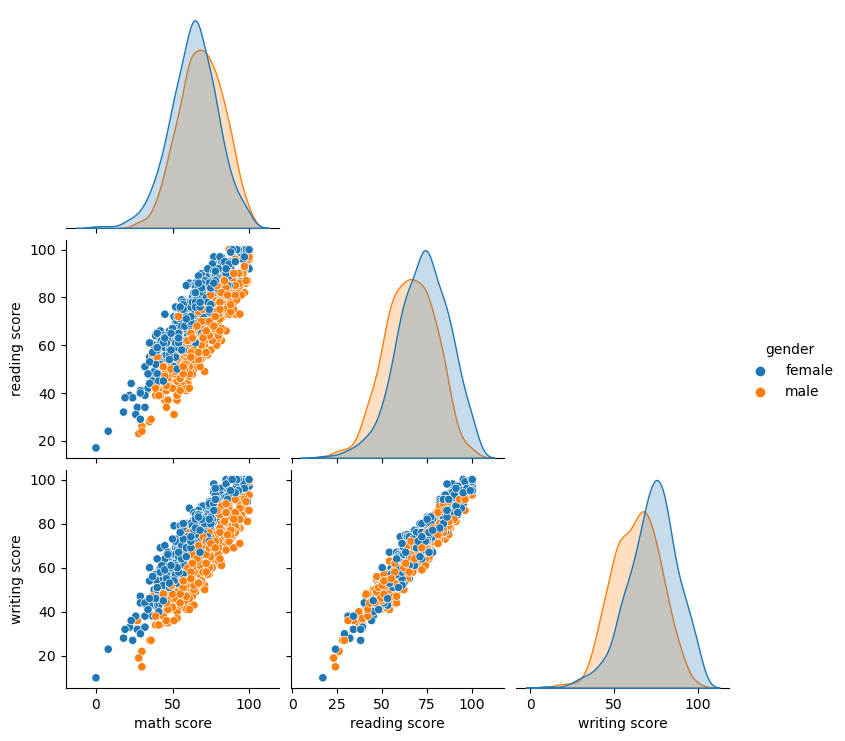

In [15]:
# corner param in pair plot ---> gets rid of the duplicate data plot & only shows lower side of the diagonal 
                                #  (showing all info without duplicate plot) 

sns.pairplot(data=df, hue='gender', corner=True) # passing corner param as true to get rid of duplicate plots

#Nb --> we can filter down & explore numerical features in diff category ourselve 

#NB ---> i.e as the more numeric feature we have, the larger this pair plot grid becomes

        # eg- if we have 10 by 10 grid of all this continuos feature combination, then it get cumbersome to look at 
        understanding the plot 
        -- also: it get very intensive for our CPU & memory to handle

-----> i.e, it is recommended we select a subfilter of the continuos feture columns we are interested in before calling in this pair plot

    eg - we can 20 numerical type columns in our dataframe, then we fiter out by column we are most interested in which are coorelated & then call pair plot on that   

In [16]:
# approach we can take 

#----> call out pair plot after filter out dataframe column 

#----> & then base on what we are intersted in pairplot, we can dive deeper with joint plot tto explore distrubution in it



In [17]:
# this is it for comparison plots :)